In [1]:
# Load the Libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Data

def load_data():
    X = np.load("ex7_X.npy")
    return X

X = load_data()

In [3]:
print(f"Shape of the Data Set: {X.shape}")
print("\n")
print(f"First Five Elements of X:\n {X[:5]}")

Shape of the Data Set: (300, 2)


First Five Elements of X:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


## K-Means Clustering

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize Centroids
    # K is the Number of Clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster Assignment Step: 
        # Assign Each Data Point to the Closest Centroid. 
        # idx[i] Corresponds to the Index of the Centroid Assigned to Example i
        idx = find_closest_centroids(X, centroids)

        # Move Centroid Step: 
        # Compute Means based on Centroid Assignments
        centroids = compute_centroids(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps: 
    1. Assigning each training example $x^{(i)}$ to its closest centroid, and
    2. Recomputing the mean of each centroid using the points assigned to it. 
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids. 

* However, the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations. 
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

### Finding the Closest Centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

#### Step 1) Assignment

`find_closest_centroids`. 
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-Norm

In [4]:
def find_closest_centroids(X, centroids):
    """
    Computes the Centroid Memberships for Every Example.
    
    Args:
        X (ndarray): (m, n) Input Values      
        centroids (ndarray): (K, n) Centroids
    
    Returns:
        idx (array_like): (m,) Closest Centroids
    """

    # Set K
    K = centroids.shape[0]

     # 1-dim Array that Holds the Index of the Closest Centroid to Every Training Example
    idx = np.zeros(X.shape[0], dtype=int)
    
    # Number of Training Examples
    m = X.shape[0]
    
    for i in range(m):
        # An Array that Stores the Distance between the Example i and Each Centroid 
        distance_i = np.zeros(K)
        
        # Loop the Example i, K (Number of Centroids) Times and Find the L2-Norm (Squared)
        for j in range(K):
            distance_i[j] = np.sum(np.square(X[i] - centroids[j]))
        
        # Closest Centroid for the Example i is the Centroid that Gives the Lowest L2-Norm (Squared)
        # Get Its Index
        idx[i] = np.argmin(distance_i)
            
    return idx    

In [5]:
# Test 

# Select an Initial Set of Centroids (K=3)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

idx = find_closest_centroids(X, initial_centroids)

# (Expected Outcome: [0, 2, 1])
print(f"First Three Elements in idx: {idx[:3]}")

First Three Elements in idx: [0 2 1]


<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

#### Step 2) Update

`compute_centroids`

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [6]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data Points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       Number of Centroids
    
    Returns:
        centroids (ndarray): (K, n) New Centroids Computed
    """
    
    # Useful Variables
    m, n = X.shape
    
    centroids = np.zeros((K, n))
        
    # Loop through Each Centroid k
    for k in range(K):
        # Each Centroid has (n=2) Features 
        updated_centroid_k = np.zeros(n)
        
        # Number of Examples in Centroid k
        num_exampl_k = np.sum(idx == k)
        
        # Loop through the Data Set, if an Example belongs to Centroid k, Add it to the updated_centroid_k
        for i in range(m):
            if idx[i] == k:
                updated_centroid_k += X[i]
        
        # Formula
        updated_centroid_k = updated_centroid_k / num_exampl_k
        
        # Update the Centroid
        centroids[k] = updated_centroid_k
            
    return centroids

In [7]:
# Test

K = 3
centroids = compute_centroids(X, idx, K)

# Expected Output:
"""
The Centroids Are:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
"""
print(f"The Centroids Are:\n {centroids}")

The Centroids Are:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### Running K-Means on the Data Set

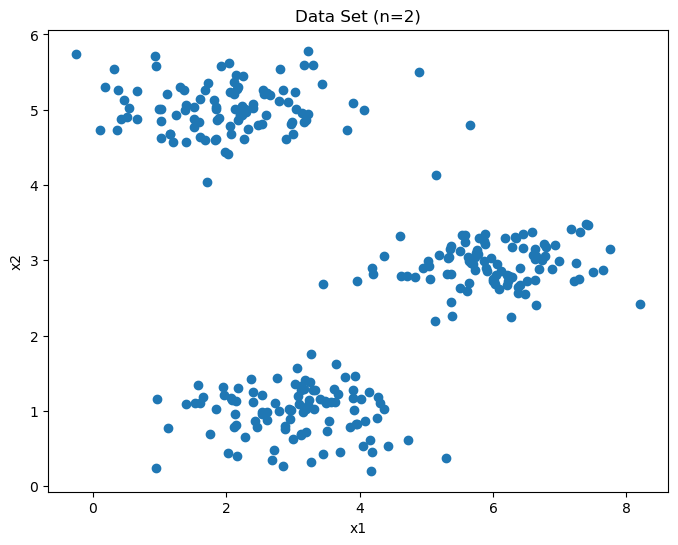

In [8]:
# Plot the Data Set

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X[:,0], X[:,1])

plt.title("Data Set (n=2)")
plt.xlabel("x1")
plt.ylabel("x2")

plt.show()

In [9]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means Algorithm on data Matrix X.
    """
    
    # Initialize Values
    m, n = X.shape
    K = initial_centroids.shape[0]
    
    centroids = initial_centroids
    idx = np.zeros(m)

    # Run K-Means
    for i in range(max_iters):
        
        # Output Progress
        print(f"K-Means Iteration: {i}/{max_iters-1}")
        
        # Step 1) Assign. For Each Example in X, Assign It to the Closest Centroid
        idx = find_closest_centroids(X, centroids)
        
        # Step 2) Update. Given the Memberships, Compute New Centroids
        centroids = compute_centroids(X, idx, K)
        
    return centroids, idx

In [10]:
# Test

initial_centroids = np.array([[3,3],[6,2],[8,5]])
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means Iteration: 0/9
K-Means Iteration: 1/9
K-Means Iteration: 2/9
K-Means Iteration: 3/9
K-Means Iteration: 4/9
K-Means Iteration: 5/9
K-Means Iteration: 6/9
K-Means Iteration: 7/9
K-Means Iteration: 8/9
K-Means Iteration: 9/9


In [11]:
print(f"Centroids:\n {centroids}")
print("\n")
print(f"First Three Elements in idx: {idx[:3]}")

Centroids:
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


First Three Elements in idx: [0 2 2]


In [12]:
# Plot the Data Set w/ Clusters


def plot_kMeans(centroids, idx):
    fig, ax = plt.subplots(figsize=(8,6))

    # Plotting the Clusters
    for i in range(centroids.shape[0]):
        points = X[idx == i]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')

    # Plotting the Centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

    # Labels and Title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Means Clustering')
    plt.legend()

    # Show the Plot
    plt.show()

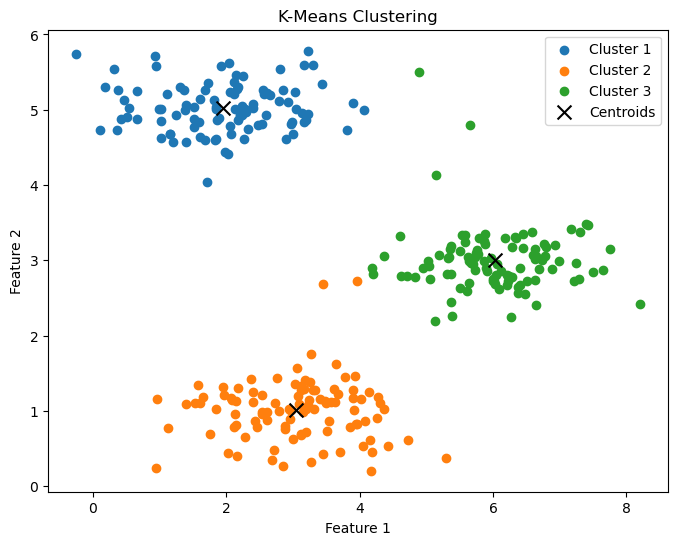

In [13]:
# Figure 1

plot_kMeans(centroids, idx)

### Random Initialization

The initial assignments of centroids for the example dataset was designed so that you will see the same figure as in Figure 1. In practice, a good strategy for initializing the centroids is to select random examples from the
training set.

In this part of the exercise, you should understand how the function `kMeans_init_centroids` is implemented.
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.

In [14]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K Centroids that are to be 
    used in K-Means on the Data Set X.
    
    Args:
        X (ndarray): Data Points 
        K (int):     Number of Centroids/Clusters
    
    Returns:
        centroids (ndarray): Initialized Centroids
    """
    
    # Randomly Re-Order the Indices of Examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the First K Examples as Centroids
    centroids = X[randidx[:K]]
    
    return centroids

### Run K-Means (w/ Random Initialization)

In [15]:
# Set Number of Centroids and Max Number of Iterations
K = 3
max_iters = 10

# Set Initial Centroids by Picking Random Examples from the Data Set
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means Iteration: 0/9
K-Means Iteration: 1/9
K-Means Iteration: 2/9
K-Means Iteration: 3/9
K-Means Iteration: 4/9
K-Means Iteration: 5/9
K-Means Iteration: 6/9
K-Means Iteration: 7/9
K-Means Iteration: 8/9
K-Means Iteration: 9/9


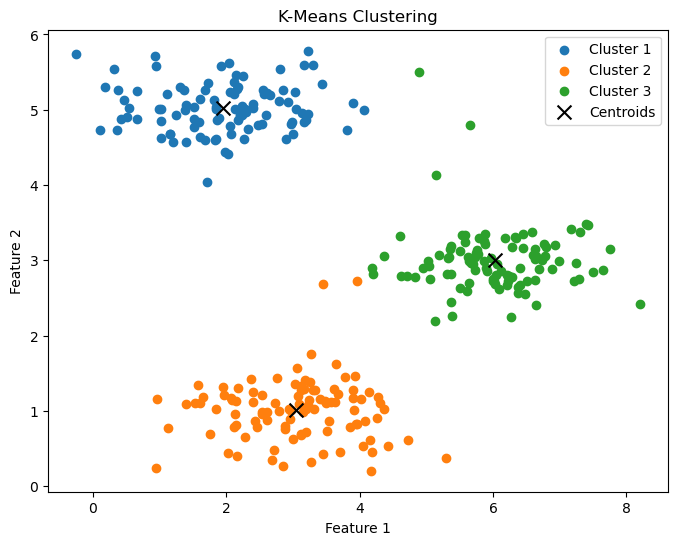

In [16]:
plot_kMeans(centroids, idx)

In [17]:
# Set Number of Centroids and Max Number of Iterations
K = 5
max_iters = 10

# Set Initial Centroids by Picking Random Examples from the Data Set
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters)

K-Means Iteration: 0/9
K-Means Iteration: 1/9
K-Means Iteration: 2/9
K-Means Iteration: 3/9
K-Means Iteration: 4/9
K-Means Iteration: 5/9
K-Means Iteration: 6/9
K-Means Iteration: 7/9
K-Means Iteration: 8/9
K-Means Iteration: 9/9


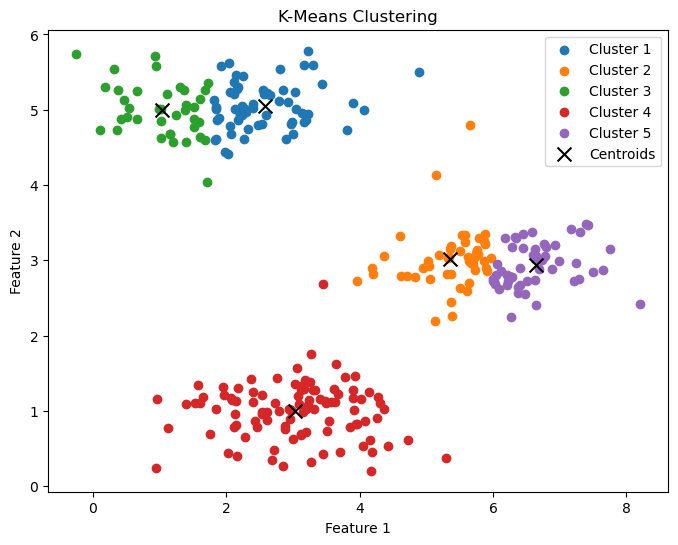

In [18]:
plot_kMeans(centroids, idx)